In [0]:
from google.colab import drive
drive.mount('/gdrive/')
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive/
Mounted at /content/gdrive/


In [0]:
import sys
sys.path.append('/content/gdrive/My Drive/Colab Notebooks/SacnnKeras/DataPreparation')
sys.path.append('/gdrive/My Drive/Colab Notebooks/SacnnKeras')

In [0]:
import os
import cv2
import csv
import numpy as np
from scipy.io import loadmat
import get_density_map_gaussian

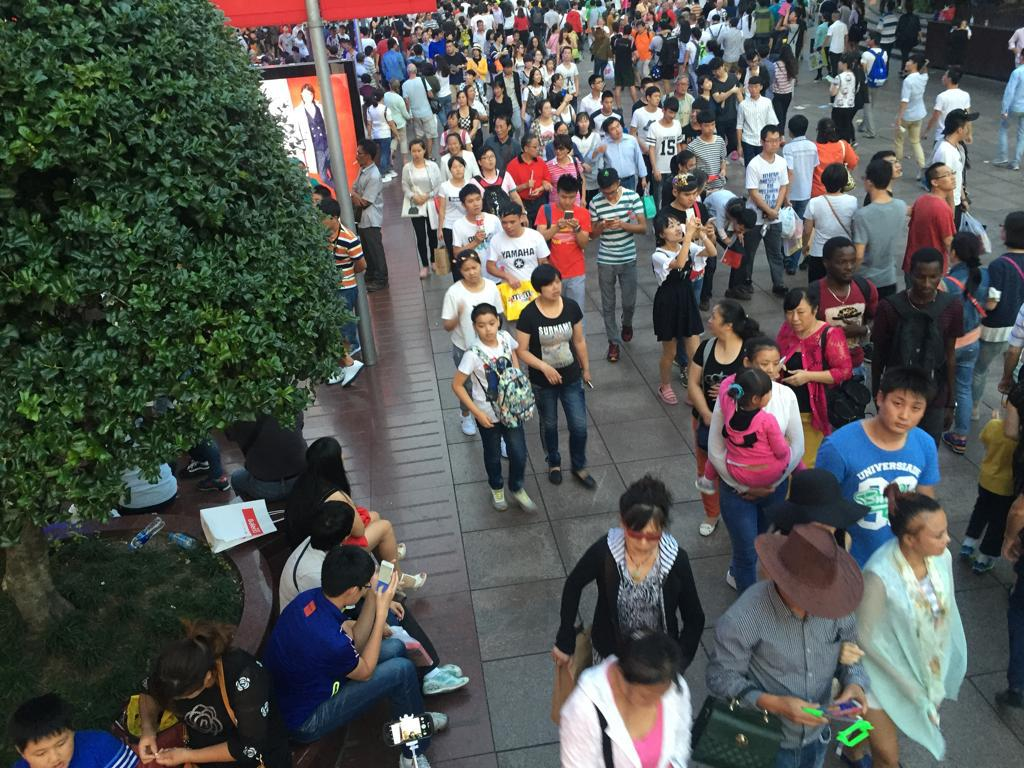

In [0]:
import cv2
from google.colab.patches import cv2_imshow
a=cv2.imread('/content/gdrive/My Drive/Colab Notebooks/SacnnKeras/datasets/ShanghaiTech/train_data/images/1.jpg')
cv2_imshow(a)

In [0]:
dataset_name = 'ShanghaiTech'
path = ''.join(['/content/gdrive/My Drive/Colab Notebooks/SacnnKeras/datasets/ShanghaiTech/test_data/images/'])
gt_path = ''.join(['/content/gdrive/My Drive/Colab Notebooks/SacnnKeras/datasets/ShanghaiTech/test_data/ground-truth/'])
gt_path_csv = ''.join(['/content/gdrive/My Drive/Colab Notebooks/SacnnKeras/datasets/ShanghaiTech/test_data/ground-truth_csv/'])
if os.path.exists(gt_path_csv):
    print('path working')
    os.makedirs(gt_path_csv)
# if dataset == 'A':
#     num_images = 182
# else:
#     num_images = 316

num_images=498
for i in range(1, num_images+1):    
    if i % 10 == 0:                                     
        print('Processing {}/{} files'.format(i, num_images), '\nwriting to {}'.format(''.join([gt_path_csv, 'IMG_', str(i), '.csv'])))
    image_info = loadmat(''.join((gt_path, str(i), '.mat')))['image_info']
    input_img_name = ''.join((path, str(i), '.jpg'))
    im = cv2.imread(input_img_name, 0)
    annPoints =  image_info[0][0][0][0][0] - 1
    im_density = get_density_map_gaussian.get_density_map_gaussian(im, annPoints)
    with open(''.join([gt_path_csv, 'IMG_', str(i), '.csv']), 'w', newline='') as fout:
        writer = csv.writer(fout)
        writer.writerows(im_density)